# Problem Session 3

In this problem session we practice our skills with :

* Exploratory Data Analysis
* Simple linear regression
* Multiple linear regression
* kFold cross validation


In [1]:
## We first load in packages we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#### 1. Introducing the data

In this notebook you will work with a data set on vehicle prices found on Kaggle.com, <a href="https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho">https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho</a>.

These data provide the selling price of vehicles as well as various features that may or may not be related to those selling prices.

##### a. 

First load the data for this problem. It is stored in the file `car_sales.csv` in the `Data` folder of the repository. After loading the data look at the first five rows of the dataset. Then run `cars.info()`, are there any missing values?

In [2]:
## code here
carsdf = pd.read_csv('car_sales.csv')
carsdf.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000.0,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
## code here
carsdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8127 non-null   float64
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 825.6+ KB


The mileage, engine, max_power, torque, and seats columns all have missing values



##### b.

Take a second to read through the descriptions for each of the columns of the data set.

- `name`: the name of the vehicle that was sold
- `year`: the year that the vehicle was made
- `selling_price`: the price of the vehicle when it was sold, what we want to predict
- `km_driven`: the number of kilometers the vehicle had driven by the time it was sold
- `fuel`: what kind of fuel the vehicle takes
- `seller_type`: the kind of entity selling the vehicle
- `transmission`: the kind of transmission in the vehicle
- `owner`: how many owners has this vehicle had
- `mileage`: how many kilometers per hour the vehicle is expected to get
- `engine`: size of the engine in cubic centimeters
- `max_power`: the maximum horsepower of the vehicle
- `torque`: the torque of the vehicle
- `seats`: the number of seats in the vehicle

##### c.

Come up with two use cases for this data set. Try to make one fit more with an explanatory modeling perspective and the other with a predictive modeling perspective.

##### Write here

Predictive Perspective:
Use the data to predict the selling price of a car based off of factors such as km_driven, year, transmission, owner, etc.

Explanatory Perspective:
Use the data to determine if there is a relationship between the selling price and the engine size.


##### d. 

There are future lecture notebooks that cover ways to <i>impute</i> missing values, but for this notebook you will simply remove the missing values. 

Use `dropna`, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html</a> to get a version of the data set that has had the missing values removed.

In [4]:
## code here
carsdf.dropna(inplace=True)
carsdf.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7905 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7905 non-null   object 
 1   year           7905 non-null   int64  
 2   selling_price  7905 non-null   int64  
 3   km_driven      7905 non-null   float64
 4   fuel           7905 non-null   object 
 5   seller_type    7905 non-null   object 
 6   transmission   7905 non-null   object 
 7   owner          7905 non-null   object 
 8   mileage        7905 non-null   object 
 9   engine         7905 non-null   object 
 10  max_power      7905 non-null   object 
 11  torque         7905 non-null   object 
 12  seats          7905 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 864.6+ KB


In [5]:
## code here



##### e.

Looking at the first five rows you can notice that the columns `mileage`, `engine` and `max_power` represent numeric variables, but currently contain text. Before doing any modeling you will have to clean the data a little bit.

Using `.apply`, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html</a>, and the function `clean_column` below clean up the `mileage`, `engine` and `max_power` columns. The end results should be purely numeric versions of those columns.

We should also transform `year` slightly. These data were uploaded in 2020, meaning we can use 2020 as a reference year to calculate the age of the car at the moment it was sold. Create a new column called `age` that calculates the age of the car using 2020 as the reference year.

In [6]:
def clean_column(text):
    return float(text.split()[0])

In [7]:
## code here
#clean_column(carsdf['engine'].values)
carsdf['mileage'] = carsdf['mileage'].apply(clean_column)
carsdf['engine'] = carsdf['engine'].apply(clean_column)
carsdf['max_power'] = carsdf['max_power'].apply(clean_column)


In [8]:
## code here
carsdf['age'] = 2020 - carsdf['year']
carsdf.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age
0,Maruti Swift Dzire VDI,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,6
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,6
2,Honda City 2017-2020 EXi,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,14
3,Hyundai i20 Sportz Diesel,2010,225000,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,10
4,Maruti Swift VXI BSIII,2007,130000,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,13


### Predictive Model

In the next couple of problem session notebooks you will build a series of models to predict the sale price of a given vehicle. In this notebook we will work on models that take in a single feature and use multiple features in a later notebook.

#### 2. Train test split

The first step in predictive modeling is performing a train test split. Perform a train test split on these data, setting aside $20\%$ of the data as a test set. Choose a `random_state` so your results are reproducible.

As a refresher you can use `sklearn`'s `train_test_split` function, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html</a>.

In [9]:
## Import train_test_split here
from sklearn.model_selection import train_test_split

In [10]:
## Make your split here
## call the training set cars_train
## call the test set cars_test
#cars_train, cars_test, price_train, price_test = train_test_split(carsdf.loc[:, carsdf.columns != 'selling_price'], carsdf['selling_price'], test_size=0.2, random_state=64)
cars_train, cars_test = train_test_split(carsdf, test_size=0.2, random_state=64)

#### 3. Exploratory data analysis (EDA)

After the train test split we can work on some exploratory data analysis. Here is where we start to look at the data and see if we can generate any modeling ideas or hypotheses. You will make a series of plots and learn a modeling trick that should improve any models we make.

##### a.

Fill in the code below to make histograms of `selling_price` and `km_driven` using the training data.

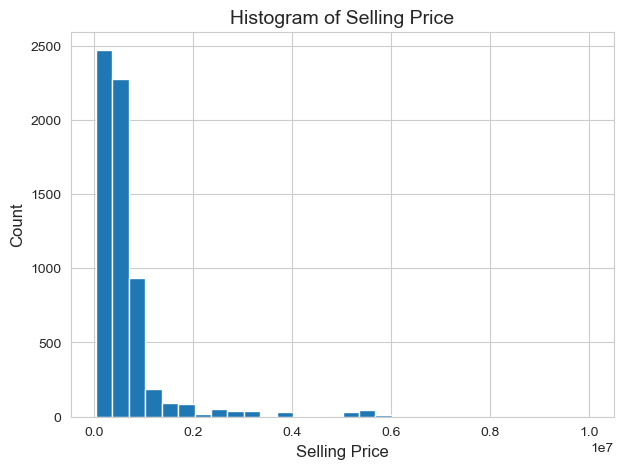

In [11]:
plt.figure(figsize=(7,5))

## Input the desired data
plt.hist(cars_train['selling_price'], bins=30)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.ylabel("Count", fontsize=12)
plt.xlabel("Selling Price", fontsize=12)

plt.title("Histogram of Selling Price", fontsize=14)

plt.show()

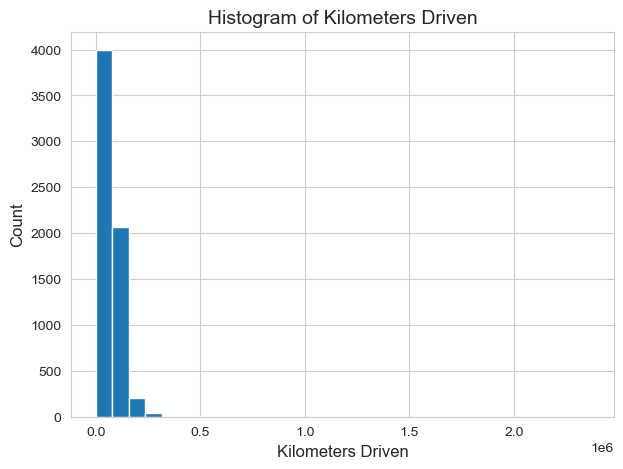

In [12]:
plt.figure(figsize=(7,5))

## Input the desired data
plt.hist(cars_train['km_driven'], bins=30)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.ylabel("Count", fontsize=12)
plt.xlabel("Kilometers Driven", fontsize=12)

plt.title("Histogram of Kilometers Driven", fontsize=14)

plt.show()

##### b. 

Now use `seaborn`'s `pairplot`, <a href="https://seaborn.pydata.org/generated/seaborn.pairplot.html">https://seaborn.pydata.org/generated/seaborn.pairplot.html</a> to plot `selling_price` against `km_driven`, `mileage` and `age`. Shell code is provided for you below.

C:\Anaconda3\envs\Aug6_2023new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


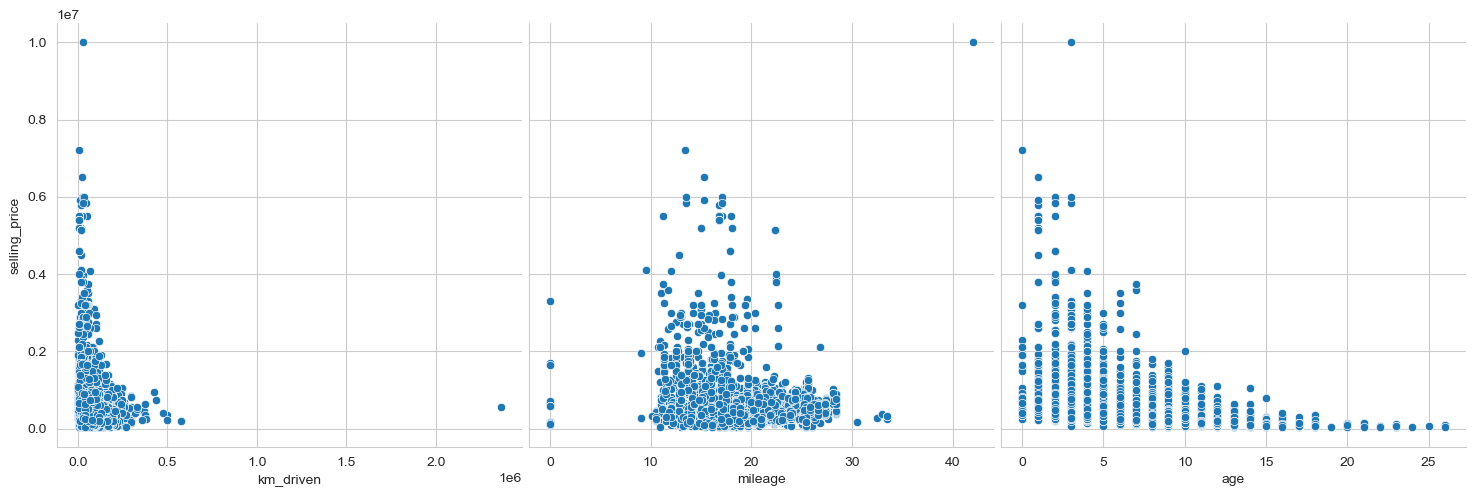

In [13]:
sns.pairplot(cars_train, ## put the data frame here
                y_vars = 'selling_price', ## put a list of the desired vertical variables here
                x_vars = ['km_driven', 'mileage', 'age'], ## put a list of the desired horizontal variables here
                height = 5)

plt.show()

##### c.

Do any of the previous relationships look linear? 

##### Write here
None of them look linear but there are strong trends (correlations) for the km_driven and the age of the car. The mileage seems to have a weaker correlation.

##### d.

Now you will learn a common trick in regression. Even if there is no direct linear relationship, we may still obtain a linear relationship between *transformed* versions of our variables.  When your distribution is highly skewed it can be useful to perform a $\log$ transformation on the data.

Make new columns in your training set that take the base 10 $\log$ of `selling_price` and `km_driven`, then remake the `pairplot` replacing `selling_price` and `km_driven` with these newly transformed columns.

<i>Hint: <a href="https://numpy.org/doc/stable/reference/generated/numpy.log10.html">https://numpy.org/doc/stable/reference/generated/numpy.log10.html</a></i>

In [14]:
## Make the new columns here
cars_train['log_selling_price'] = np.log10(carsdf['selling_price'])
cars_train['log_km_driven'] = np.log10(carsdf['km_driven'])
cars_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age,log_selling_price,log_km_driven
5878,Tata Nano Lx,2011,70000,40000.0,Petrol,Individual,Manual,First Owner,26.00,624.0,35.0,4.8kgm@ 3000rpm,4.0,9,4.845098,4.602060
4634,Maruti Ritz LXI,2011,215000,40000.0,Petrol,Individual,Manual,First Owner,21.10,1197.0,85.8,114Nm@ 4000rpm,5.0,9,5.332438,4.602060
2711,Maruti Baleno Delta 1.2,2017,570000,35000.0,Petrol,Individual,Manual,First Owner,21.40,1197.0,83.1,115Nm@ 4000rpm,5.0,3,5.755875,4.544068
5907,Maruti Swift Dzire VDI,2014,470000,60000.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.0,190Nm@ 2000rpm,5.0,6,5.672098,4.778151
2756,Maruti Baleno Delta 1.3,2018,600000,60000.0,Diesel,Individual,Manual,First Owner,27.39,1248.0,74.0,190Nm@ 2000rpm,5.0,2,5.778151,4.778151


C:\Anaconda3\envs\Aug6_2023new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


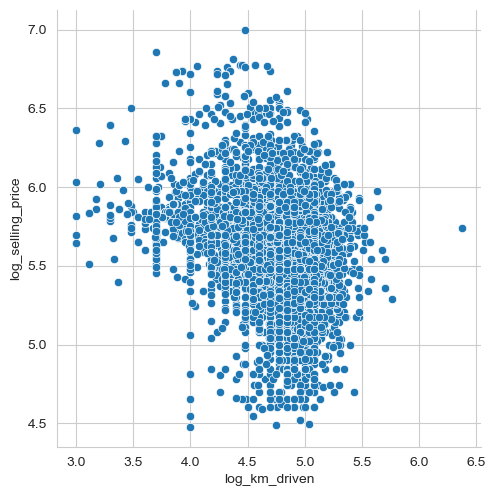

In [15]:
## Fill in the shell code
sns.pairplot(cars_train,
                y_vars = 'log_selling_price',
                x_vars = 'log_km_driven',
                height = 5)


plt.show()

##### e.

Another part of EDA is calculating descriptive statistics.

One statistic of interest to us in this situation is the <i>Pearson correlation coefficient</i>. For two variables $x$ and $y$ with $n$ observations each, the Pearson correlation is given by:

$$
r = \frac{\sum_{i=1}^n \left( x_i - \overline{x} \right) \left( y_i - \overline{y}  \right)}{\sqrt{\sum_{i=1}^n \left(x_i - \overline{x}\right)^2 \sum_{i=1}^n \left(y_i - \overline{y} \right)^2}} = \frac{\text{cov}\left(x, y\right)}{\sigma_x \sigma_y},
$$

where $x_i$ is the $i^\text{th}$ observation, $\overline{x} = \sum_{i=1}^n x_i/n$, $\text{cov}\left( x, y \right)$ is the covariance between $x$ and $y$, and $\sigma_x$ denotes the standard deviation of $x$.

$r \in [-1,1]$ gives a sense of the strength of the linear relationship between $x$ and $y$. The closer $|r|$ is to $1$, the stronger the linear relationship between $x$ and $y$, the sign of $r$ determines the direction of the relationship, with $r < 0$ meaning a line with a negative slope and $r > 0$ a line with a positive slope.

Calculate the correlation between `log_sell` and the columns you have previously plotted.

<i>Hint: Either <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html</a> or <a href="https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html">https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html</a> should work.</i>.

In [16]:
## code here

cars_train[['log_selling_price','log_km_driven','km_driven','mileage','age']].corr()


,log_selling_price,log_km_driven,km_driven,mileage,age
log_selling_price,1.000000,-0.365567,-0.247846,-0.034281,-0.703328
log_km_driven,-0.365567,1.000000,0.754987,-0.120229,0.545773
km_driven,-0.247846,0.754987,1.000000,-0.169863,0.434078
mileage,-0.034281,-0.120229,-0.169863,1.000000,-0.321868
age,-0.703328,0.545773,0.434078,-0.321868,1.000000


##### f.

Based on your EDA, which feature do you think would best predict `log_sell` in a simple linear regression model?

##### Write here
Age would probably be the strongest predictor since it has the strongest correlation.


#### 4. Modeling

Now you will build some preliminary models for this data set.

##### a.

When doing predictive modeling it is good practice to have a <i>baseline model</i> which is a simple "model" solely for comparison purposes. These are not, typically, complex or good models, but they are important reference points to give us a sense of how well our models are actually performing.

A standard regression model baseline is to just predict the average value of $y$ for any value of $X$. In this setting that model looks like this:

$$
\text{Baseline Model: } \ \ \ \ \log\left(\text{Selling Price}\right) = E(\log\left(\text{Selling Price}\right)) + \epsilon,
$$

where $\epsilon$ is some random noise.

Write some code to estimate $E(\log\left(\text{Selling Price}\right))$ using the training set.

In [17]:
## code here
logsellmean = cars_train['log_selling_price'].mean()
#logsellmean = cars_train.log_selling_price.mean()
logsellmean


5.644947727894845

##### b.

Below you will use cross-validation to compare these 3 simple linear regression models, 1 multiple linear regression model,  and the baseline model from above:

$$
\text{Model 1}: \ \log\left(\text{Selling Price}\right) = \beta_0 + \beta_1 \log\left( \text{Kilometers Driven} \right) + \epsilon
$$

$$
\text{Model 2}: \ \log\left(\text{Selling Price}\right) = \beta_0 + \beta_1 \text{Mileage} + \epsilon
$$

$$
\text{Model 3}: \ \log\left(\text{Selling Price}\right) = \beta_0 + \beta_1 \text{Age} + \epsilon
$$

$$
\text{Model 4}: \ \log\left(\text{Selling Price}\right) = \beta_0 + \beta_1 \text{Mileage}  + \beta_2 \text{Age} + \epsilon
$$

In this problem practice fitting just one of these three models using the training set and `sklearn`'s `LinearRegression` model, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html</a>.

In [18]:
## Import LinearRegression here
from sklearn.linear_model import LinearRegression

In [19]:
# cars_train['log_km_driven'].reshape(-1,1) This doesn't work because it is a Series
#cars_train['log_km_driven'].values.reshape(-1,1)  This does work.


In [43]:
## Make your model object 
#linear = LinearRegression() if you try to fit them all with linear.fit(..) the fits like bleed over and it doesn't work they each
#need their own instance of LinearRegression
model1 = LinearRegression().fit(cars_train['log_km_driven'].values.reshape(-1,1), cars_train['log_selling_price'].values.reshape(-1,1))
model2 = LinearRegression().fit(cars_train['mileage'].values.reshape(-1,1), cars_train['log_selling_price'].values.reshape(-1,1))
model3 = LinearRegression().fit(cars_train['age'].values.reshape(-1,1), cars_train['log_selling_price'].values.reshape(-1,1))
model4 = LinearRegression().fit(cars_train[['mileage', 'age']].values.reshape(-1,2), cars_train['log_selling_price'].values.reshape(-1,1))
# Fit the model using the training set



In [44]:
model1.n_features_in_

1

In [45]:
#model4.n_features_in_

In [46]:
## Practice looking at the intercept estimate
print(model1.intercept_, model4.intercept_)

[7.25826747] [6.59086513]


In [47]:
## Practice looking at the coefficient estimate
print(model1.coef_, model4.coef_)

[[-0.34261302]] [[-0.02581347 -0.07400074]]


##### c.

In this problem you will try to implement $5$-fold cross-validation (CV) to compare these three models and the baseline model to see which one has the lowest average cross-validation mean squared error (MSE).

Because this may be your first time implementing CV, some of the code will be filled in for you.

In [49]:
## import KFold here
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
## mse(true, predicted)


In [51]:
## Make a KFold object
## remember to set a random_state and set shuffle = True
kfold = KFold(n_splits=5, shuffle=True, random_state=64) #pay attention to upper and lower case when calling




## This array will hold the mse for each model and split
mses = np.zeros((5, 5))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(cars_train):    #doesn't necessarily need a y
    ## get the cv training set
    cars_tt = cars_train.iloc[train_index]
    
    ## get the cv holdout set
    cars_ho = cars_train.iloc[test_index]
    
    ## "Fit" and get ho mse for the baseline model
    baseline_pred = cars_tt['log_selling_price'].mean()*np.ones(len(cars_ho))
    
    mses[0, i] = mse(cars_ho['log_selling_price'], baseline_pred)
    
    ## Fit and get the mses for the remaining models #Have to redo this because don't want to train on hold out data
                                                     #Like you did earlier
    #Model 1
    reg1 = LinearRegression().fit(cars_tt['log_km_driven'].values.reshape(-1,1), cars_tt['log_selling_price'].values)
    mses[1,i] = mse(cars_ho['log_selling_price'], reg1.predict(cars_ho['log_km_driven'].values.reshape(-1,1))) 
    
    #Model 2
    reg2 = LinearRegression().fit(cars_tt['mileage'].values.reshape(-1,1), cars_tt['log_selling_price'].values)
    mses[2,i] = mse(cars_ho['log_selling_price'], reg2.predict(cars_ho['mileage'].values.reshape(-1,1)))
    
    #Model 3
    reg3 = LinearRegression().fit(cars_tt['age'].values.reshape(-1,1), cars_tt['log_selling_price'].values)
    mses[3,i] = mse(cars_ho['log_selling_price'], reg3.predict(cars_ho['age'].values.reshape(-1,1)))
    
    #Model 4
    reg4 = LinearRegression().fit(cars_tt[['mileage','age']].values.reshape(-1,2), cars_tt['log_selling_price'].values)
    mses[4,i] = mse(cars_ho['log_selling_price'], reg4.predict(cars_ho[['mileage','age']].values.reshape(-1,2)))
    
    ## Increasing the counter
    i = i + 1

In [54]:
## Find the avg cv mse for each model here
print('Mean of Cross-Validated Mean Squared Errors:\n')
print('Model 0:', mses[0,:].mean())
print('Model 1:', mses[1,:].mean())
print('Model 2:', mses[2,:].mean())
print('Model 3:', mses[3,:].mean())
print('Model 4:', mses[4,:].mean())

Mean of Cross-Validated Mean Squared Errors:

Model 0: 0.12785046031267963
Model 1: 0.11082971942686173
Model 2: 0.12772183161536574
Model 3: 0.06464514608277343
Model 4: 0.05496460197537251


##### d.

Which model had the lowest average cross validation mean squared error?

##### Write here

Model 4 which had you fit for both the milage and the age. Logically people look at both of these when buying a car

That's it for this notebook. In the next couple of regression based notebooks we will build additional models for this data set.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)